# Extraindo as Letras da Discografia da Normani

Normani Kordei Hamilton (Atlanta, 31 de maio de 1996) é uma cantora, compositora e dançarina estadunidense. Ela é conhecida por ter sido integrante do grupo feminino Fifth Harmony, formado através da segunda temporada do *reality show The X Factor US* em 2012. Em 2017, ela tornou-se concorrente da vigésima quarta temporada de *Dancing With The Stars*, ficando em terceiro lugar na competição. Após o fim do grupo, seu primeiro single, *Love Lies*, lançado em colaboração com o cantor Khalid e gravado como trilha sonora do filme *Love, Simon* alcançou o número 9 da *Billboard Hot 100*. Além de Khalid, Normani já colaborou com Ariana Grande, Cardi B, Nicki Minaj, Megan Thee Stallion, Sam Smith, Calvin Harris e entre outros nomes conhecidos da música.

Mais informações no link: https://pt.wikipedia.org/wiki/Normani

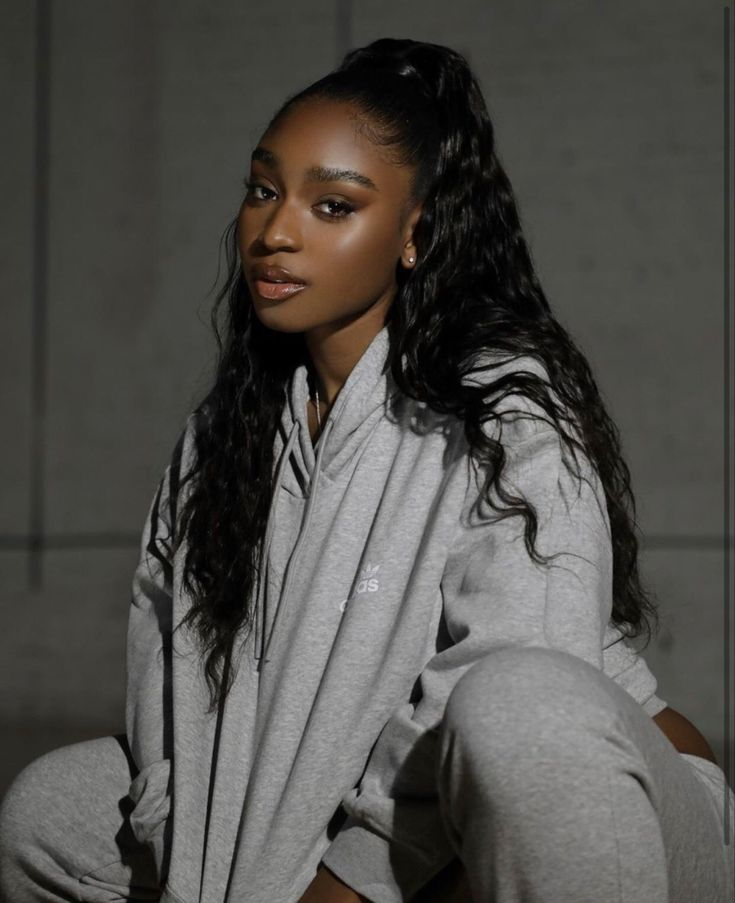

## API LyricsGenius

A API LyricsGenius é uma poderosa ferramenta que permite acessar uma vasta coleção de letras de músicas e informações sobre artistas. Desenvolvida pela Genius, uma plataforma conhecida por sua base de dados de letras e anotações, a API oferece funcionalidades que facilitam a busca por letras, detalhes de álbuns, informações sobre colaboradores e muito mais. Com suporte a consultas por nome de artista, título da música ou até mesmo trechos de letras, a API é especialmente útil para desenvolvedores que desejam integrar dados musicais em aplicativos e sites. Além disso, a API fornece recursos para obter anotações e interpretações das letras, enriquecendo a experiência do usuário ao explorar o significado das músicas. Através da LyricsGenius API, os amantes da música e os desenvolvedores podem aprofundar sua compreensão sobre as canções e seus criadores, trazendo um novo nível de interação com a música.

Mais informações e a documentação de como usar a API no link: https://docs.genius.com/

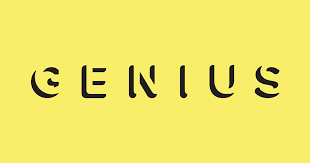





In [ ]:
import os
import pandas as pd
import requests
import lyricsgenius
import csv

# Chamada de Requisição
api_key = "YOUR_API_KEY"
genius = lyricsgenius.Genius(api_key)

# Busca do artista na API
artist = genius.search_artist("Normani", max_songs=35)

Searching for songs by Normani...

Song 1: "Wild Side"
Song 2: "Motivation"
Song 3: "Waves"
Song 4: "Candy Paint"
Song 5: "Checklist"
Song 6: "Fair"
Song 7: "Slow Down"
Song 8: "Wild Side (Extended Version)"
Song 9: "1:59"
Song 10: "Big Boy"
Song 11: "All Yours"
Song 12: "Still"
Song 13: "Insomnia"
Song 14: "Lights On"
Song 15: "Black Woman"
Song 16: "Tantrums"
Song 17: "Take My Time"
Song 18: "Little Secrets"
Song 19: "Fake Love x Sneakin’"
Song 20: "Grip"
Song 21: "Distance"
Song 22: "Motivation (Savage Remix)"
Song 23: "Ring (Demo)"
Song 24: "You’re Lucky I Let You Love Me"
Song 25: "1 On 1"
Song 26: "Say It  (Cover)"
Song 27: "Sing to You"
Song 28: "Don’t Touch My Hair x Cranes In The Sky"
Song 29: "So Into You (Cover)"
"Magic" is not valid. Skipping.
Song 30: "DUI"
Song 31: "Nah Nah Nah*"
Song 32: "Rocket"
Song 33: "Wild Side (KAYTRANADA Remix)"
Song 34: "Feel Me"
Song 35: "Make It Hard"

Reached user-specified song limit (35).
Done. Found 35 songs.


In [ ]:
# Importando para um arquivo json
artist.save_lyrics()

Wrote Lyrics_Normani.json.


In [ ]:
# Acessando as chaves principais dos dados contidos no arquivo JSON
data = json.load(open("Lyrics_Normani.json", "r"))
data.keys()

dict_keys(['alternate_names', 'api_path', 'description', 'facebook_name', 'header_image_url', 'id', 'image_url', 'instagram_name', 'is_meme_verified', 'is_verified', 'name', 'translation_artist', 'twitter_name', 'url', 'current_user_metadata', 'followers_count', 'description_annotation', 'user', 'songs'])

In [ ]:
# Carregando dados em um dataframe e examinando os dados dentro de 'songs'
df = pd.DataFrame(data['songs'])
df.keys()

Index(['annotation_count', 'api_path', 'artist_names', 'full_title',
       'header_image_thumbnail_url', 'header_image_url', 'id',
       'lyrics_owner_id', 'lyrics_state', 'path', 'primary_artist_names',
       'pyongs_count', 'relationships_index_url', 'release_date_components',
       'release_date_for_display',
       'release_date_with_abbreviated_month_for_display',
       'song_art_image_thumbnail_url', 'song_art_image_url', 'stats', 'title',
       'title_with_featured', 'url', 'featured_artists', 'primary_artist',
       'primary_artists', 'apple_music_id', 'apple_music_player_url',
       'description', 'embed_content', 'featured_video', 'language',
       'recording_location', 'release_date', 'current_user_metadata',
       'song_art_primary_color', 'song_art_secondary_color',
       'song_art_text_color', 'album', 'custom_performances',
       'description_annotation', 'lyrics_marked_complete_by',
       'lyrics_marked_staff_approved_by', 'media', 'producer_artists',
     

In [ ]:
# Selecionando os dados úteis em um novo dataframe
df_oficial = df[['title', 'lyrics', 'release_date']].copy()

# Classificando as músicas pelo álbum
df_oficial['Album'] = df['album'].apply(lambda x: x.get('name') if isinstance(x, dict) else None)

# Eliminando músicas que não pertencem aos álbuns oficiais
df_oficial = df_oficial.drop(index=[14, 18, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34])

# Reseta o índice, se necessário
df_oficial.reset_index(drop=True, inplace=True)

# Convertendo a coluna 'release_date' para o formato de data
df_oficial['release_date'] = pd.to_datetime(df_oficial['release_date'], errors='coerce')

# Extraindo apenas o ano da coluna 'release_date' para armazenar na 'release_year'
df_oficial['release_year'] = df_oficial['release_date'].dt.year

# Exibindo o dataframe resultante
df_oficial

,title,lyrics,release_date,Album,release_year
0,Wild Side,[Verse 1: Normani]\nI'm ready to pull up on yo...,2021-07-16,DOPAMINE,2021
1,Motivation,"[Intro]\nI'ma break you off, let me be your mo...",2019-08-16,Motivation - Single,2019
2,Waves,[Verse 1: Normani]\nThank God for the weekend\...,2018-11-15,None,2018
3,Candy Paint,"[Verse 1]\nBank roll, thumbin', baby, you know...",2024-05-31,DOPAMINE,2024
4,Checklist,"[Intro: Wizkid and Normani]\nOh, oh-oh, oh\nBa...",2018-10-22,Normani x Calvin Harris,2018
5,Fair,"[Verse 1]\nTwo-hundred days and countin', I kn...",2022-03-18,None,2022
6,Slow Down,"[Verse 1: Normani]\nOh, oh\nEverybody slow dow...",2018-10-22,Normani x Calvin Harris,2018
7,Wild Side (Extended Version),[Verse 1: Normani]\nI'm ready to pull up on yo...,2021-07-23,Wild Side - Single,2021
8,1:59,"[Intro: Normani]\nTurn me up, uh\nTurn me up\n...",2024-04-26,DOPAMINE,2024
9,Big Boy,"[Intro: Starrah]\nUh-huh, uh-huh\n\n[Verse 1: ...",2024-06-14,DOPAMINE,2024


In [ ]:
import nltk
from nltk.corpus import stopwords
import re

# Define uma função para remover stopwords de um texto
def remove_stopwords(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras que não estão na lista de stopwords em inglês
    text = [x for x in text if x not in stopwords.words('english')]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de stopwords em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_stopwords(x))

# Define uma função para remover pontuação do texto
def remove_ponctuation(text):
    # Usa uma expressão regular para manter apenas letras (maiúsculas e minúsculas) e junta as palavras em uma string
    return " ".join(re.findall("[a-zA-Z]+", text))

# Aplica a função de remoção de pontuação em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_ponctuation(x))

# Define uma função para remover palavras com menos de 3 caracteres do texto
def remove_words_with_less_3(text):
    # Separa o texto em uma lista de palavras
    text = text.split(' ')
    # Filtra a lista, mantendo apenas as palavras com mais de 3 caracteres
    text = [x for x in text if len(x) > 3]
    # Junta a lista de palavras filtradas em uma única string e a retorna
    return ' '.join(text)

# Aplica a função de remoção de palavras curtas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: remove_words_with_less_3(x))

# Converte todo o texto em letras minúsculas em cada linha da coluna 'lyrics' do dataframe
df_oficial.loc[:, 'lyrics'] = df_oficial.loc[:, 'lyrics'].apply(lambda x: x.lower())

# Cria uma nova coluna 'Word Count' no dataframe que conta o número de palavras em cada linha da coluna 'lyrics'
df_oficial['Word Count'] = df_oficial['lyrics'].apply(lambda x: len(x.split(' ')))

# Função para remover as palavras indesejadas
def remove_unwanted_words(text):
    words_to_remove = ["embed", "intro", "verse", "chorus", "outro", "instrumental"]
    pattern = r'\b(?:' + '|'.join(words_to_remove) + r')\b'
    return re.sub(pattern, '', text, flags=re.IGNORECASE)

# Aplicar a função na coluna de letras
df_oficial["lyrics"] = df_oficial["lyrics"].apply(remove_unwanted_words)

# Salvar o CSV atualizado
df_oficial.to_csv("NormaniLyrics.csv", index=False)

In [ ]:
import sqlite3

# Criando um banco de dados de teste
conn = sqlite3.connect('Normani.db')

# Salvando no banco de dados
df_oficial.to_sql('lyrics', conn, index=False)

# Verificando se os dados estão presentes no banco de dados
c = conn.cursor()
c.execute('''
SELECT * FROM LYRICS
          ''')
# Visualização do Banco de Dados gerado
c.fetchall()

[('Wild Side',
  ' normani ready pull ready baby wanna shoot shot cause bulletproof yeah load baby wanna ready pull ready  normani this type shit wildin last minute trips islands drip drip drip slide baby right hesitate cause know like bakin cake sweet baby like bite  normani keep talkin think often cautious wanna wild take ride show wild side know while wanna wild  normani wanna drive crazy crazy pull inside baby fuckin like oopsie daisy ands buts maybes laid shit lazy need roll shit like skatin yeah baby hold shit hate waitin shoot shot impati  normani this type shit wildin last minute trips islands drip drip drip slide baby right hesitate cause know like bakin cake sweet baby like bite  normani keep talkin think often cautious wanna wild take ride show wild side know while wanna wild  cardi look melo turn round treat like watch bust kitchen floor right towel dick want tell want back stomach baby blow like trumpet probably suck watermelon straw believe every hair come take mugler wai